### 1. Importation de packages

In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score, confusion_matrix

from sklearn.ensemble import RandomForestClassifier


# Pour les modeles de reseaux de neurons
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

### 2. Chargement des donnees

In [129]:
data = pd.read_csv('UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [132]:

print(data.shape)
data.info()

(30000, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2          

In [133]:
# Renommer la colonne 'default.payment.next.month' pour éviter les problèmes de syntaxe

data.rename(columns={"default.payment.next.month": "default_payment_next_month"}, inplace=True)

In [134]:
data['default_payment_next_month'].unique()

array([1, 0])

### 3. EDA : Exploratory Data Analysis

In [135]:
#  Afficher le dataset pour les valeurs dont la collone EDUCATION est égale à 0
data[data["EDUCATION"]== 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
3769,3770,290000.0,2,0,2,38,1,-1,-1,-1,...,1406.0,2196.0,1481.0,1437.0,3078.0,1406.0,2196.0,1481.0,0.0,0
5945,5946,270000.0,1,0,2,39,1,-1,-1,-1,...,18607.0,0.0,0.0,10193.0,70213.0,19008.0,399.0,0.0,0.0,0
6876,6877,360000.0,1,0,2,30,0,0,-1,0,...,34345.0,36777.0,30.0,23000.0,12280.0,25007.0,25008.0,1767.0,3300.0,0
14631,14632,350000.0,2,0,2,53,-1,-1,-1,-1,...,22611.0,1385.0,6043.0,4840.0,61349.0,22687.0,1389.0,6058.0,1153.0,0
15107,15108,210000.0,1,0,2,45,-2,-2,-2,-2,...,788.0,3499.0,3372.0,5854.0,1032.0,788.0,3565.0,3372.0,15381.0,0
16881,16882,100000.0,1,0,2,37,0,0,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
16896,16897,200000.0,1,0,2,40,1,-2,-1,-1,...,1000.0,0.0,0.0,0.0,200.0,1000.0,0.0,0.0,0.0,0
17414,17415,230000.0,2,0,2,47,-1,-1,-1,2,...,255.0,5425.0,4838.0,5743.0,1598.0,0.0,5425.0,4838.0,3840.0,0
19920,19921,50000.0,2,0,1,40,0,0,0,0,...,47647.0,40500.0,41921.0,2229.0,2298.0,2100.0,2500.0,1921.0,8432.0,0
20030,20031,200000.0,2,0,2,30,-1,-1,2,-1,...,9470.0,5816.0,7809.0,2880.0,0.0,9470.0,5834.0,7809.0,2886.0,0


In [137]:
# Supprimer les lignes où la colonne EDUCATION est égale à 0 vu que cela ne represente que 0.1% des donnees
data.drop(data[data["EDUCATION"]== 0].index, inplace=True)

In [138]:
# Verifie si la suppression a bien ete effectuee
data[data["EDUCATION"]== 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month


In [ ]:
# Verifie si il y a des valeurs manquantes dans le dataset
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

### 4. Data Preprocessing

In [ ]:
# Supprimer la colonne ID car elle n'est pas utile pour l'analyse
data.drop('ID', axis=1, inplace=True)

In [ ]:
# Afficher les valeurs uniques de la colonne MARRIAGE
data['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [ ]:
# Il ne peux pas y avoir de valeur 0 dans la colonne MARRIAGE 
data[data["MARRIAGE"] == 0]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
218,110000.0,2,3,0,31,0,0,0,0,0,...,73315.0,63818.0,63208.0,4000.0,5000.0,3000.0,3000.0,3000.0,8954.0,0
809,160000.0,2,2,0,37,0,0,0,0,0,...,28574.0,27268.0,28021.0,35888.0,1325.0,891.0,1000.0,1098.0,426.0,0
820,200000.0,2,3,0,51,-1,-1,-1,-1,0,...,780.0,390.0,390.0,0.0,390.0,780.0,0.0,390.0,390.0,0
1019,180000.0,2,3,0,45,-1,-1,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1443,200000.0,1,3,0,51,-1,-1,-1,-1,0,...,2529.0,1036.0,4430.0,5020.0,9236.0,2529.0,0.0,4430.0,6398.0,0
2146,150000.0,2,3,0,55,-1,-1,-1,-1,-1,...,2939.0,3396.0,1870.0,17498.0,9160.0,2939.0,3396.0,1870.0,6800.0,0
2554,220000.0,2,1,0,33,-1,-1,-1,-1,-1,...,608.0,1738.0,277.0,1531.0,942.0,608.0,1738.0,277.0,492.0,0
3056,200000.0,1,3,0,36,-2,-2,-2,-2,-2,...,41359.0,9140.0,0.0,89187.0,14178.0,41359.0,9140.0,0.0,0.0,0
4470,70000.0,1,3,0,35,2,2,2,2,2,...,50517.0,51658.0,52758.0,2200.0,1900.0,2000.0,2100.0,2100.0,2000.0,0
5005,90000.0,2,3,0,24,-2,-2,-2,-1,0,...,13574.0,6800.0,1830.0,20108.0,4000.0,13574.0,14.0,5.0,13162.0,0


In [146]:
# La valeur 0 dans la colonne MARRIAGE n'a pas de sens , mais on va affecter la valeur 3 à la valeur 0 pour representer "Autre"
data["MARRIAGE"] = data["MARRIAGE"].replace({0: 3})

In [148]:
# Afficher les valeurs uniques de la colonne MARRIAGE
data['MARRIAGE'].unique()

array([1, 2, 3])

In [149]:
# remplacer les valeurs Homme a 0 et Femme a 1 dans la colonne SEX
data["SEX"] = data["SEX"].map({1: 0, 2: 1})

In [ ]:
# Normaliser les donnees numeriques non categorielle
scaler = StandardScaler()
cols_to_scale = data.columns.drop(["default_payment_next_month", "SEX",  "EDUCATION", "MARRIAGE", "AGE", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"])

data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

In [150]:
# Afficher la correlation des differentes variables avec la variable cible(default_payment_next_month)
data.corr().default_payment_next_month.sort_values(ascending=False)

default_payment_next_month    1.000000
PAY_0                         0.324789
PAY_2                         0.263445
PAY_3                         0.235173
PAY_4                         0.216549
PAY_5                         0.204028
PAY_6                         0.186698
EDUCATION                     0.027460
AGE                           0.013984
BILL_AMT6                    -0.005514
BILL_AMT5                    -0.006896
BILL_AMT4                    -0.010274
BILL_AMT3                    -0.014183
BILL_AMT2                    -0.014332
BILL_AMT1                    -0.019780
MARRIAGE                     -0.027507
SEX                          -0.040063
PAY_AMT6                     -0.053219
PAY_AMT5                     -0.055165
PAY_AMT3                     -0.056209
PAY_AMT4                     -0.056853
PAY_AMT2                     -0.058520
PAY_AMT1                     -0.072933
LIMIT_BAL                    -0.153455
Name: default_payment_next_month, dtype: float64

In [153]:
# Selection des features qui ont ont une bonne correlation
selected_features = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL']
# Les features selectionnees
X = data[selected_features]
# La variable cible
y = data['default_payment_next_month']


In [154]:
# Afficher le dataset avec les features selectionne
X


,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL
0,2,2,-1,-1,-2,-2,20000.0
1,-1,2,0,0,0,2,120000.0
2,0,0,0,0,0,0,90000.0
3,0,0,0,0,0,0,50000.0
4,-1,0,-1,0,0,0,50000.0
...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,220000.0
29996,-1,-1,-1,-1,0,0,150000.0
29997,4,3,2,-1,0,0,30000.0
29998,1,-1,0,0,0,-1,80000.0


In [155]:
#Afficher les valeurs de la cible
y

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month, Length: 29986, dtype: int64

In [156]:
# Separation des donnees en Train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   

In [157]:
print("X_train :", X_train.shape)
print("X_test :", X_test.shape)     
print("y_train :", y_train.shape)
print("y_test :", y_test.shape) 

X_train : (23988, 7)
X_test : (5998, 7)
y_train : (23988,)
y_test : (5998,)


In [158]:
X_train

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,LIMIT_BAL
17565,-1,-1,-1,-1,-1,-2,180000.0
618,0,0,0,0,0,0,60000.0
17091,1,2,3,2,2,0,30000.0
22596,0,0,0,0,0,0,330000.0
26959,0,0,0,0,0,0,350000.0
...,...,...,...,...,...,...,...
29816,1,4,3,2,0,0,80000.0
5391,0,0,0,0,0,0,120000.0
860,-2,-2,-2,-2,-2,-2,50000.0
15800,1,2,0,0,0,0,50000.0


### Construire le shallow Neural Network

In [159]:
# Creation du model
model = Sequential()

In [160]:
#Ajout de la couche d'entree == couche cachee
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))




# Ajout de la couche de sortie
model.add(Dense(1, activation='sigmoid'))


#Compiler le model
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


# Afficher de l'architecture  ou  de la structure du model
model.summary() 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 577 (2.25 KB)

 Trainable params: 577 (2.25 KB)

 Non-trainable params: 0 (0.00 B)

In [161]:
# Entrainement du modele
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6625 - loss: 719.0634 - val_accuracy: 0.2326 - val_loss: 48.5896
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6784 - loss: 110.4195 - val_accuracy: 0.7771 - val_loss: 176.4433
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6909 - loss: 92.3525 - val_accuracy: 0.7798 - val_loss: 83.5979
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6943 - loss: 87.7553 - val_accuracy: 0.7773 - val_loss: 302.2037
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7016 - loss: 81.5266 - val_accuracy: 0.7889 - val_loss: 42.8743
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6940 - loss: 89.9103 - val_accuracy: 0.7881 - val_loss: 49.9194
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7033 - loss: 71.2737 - val_accuracy: 0.7929 - val_loss: 20.2085
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7000 - loss: 62.4767

## Visualiser l'evolution de l'entraitement du reseau de neurone


In [162]:
history

In [163]:
# Visualiser l'evolution de l'entrainement du reseau de neurone
import matplotlib.pyplot as plt


In [164]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

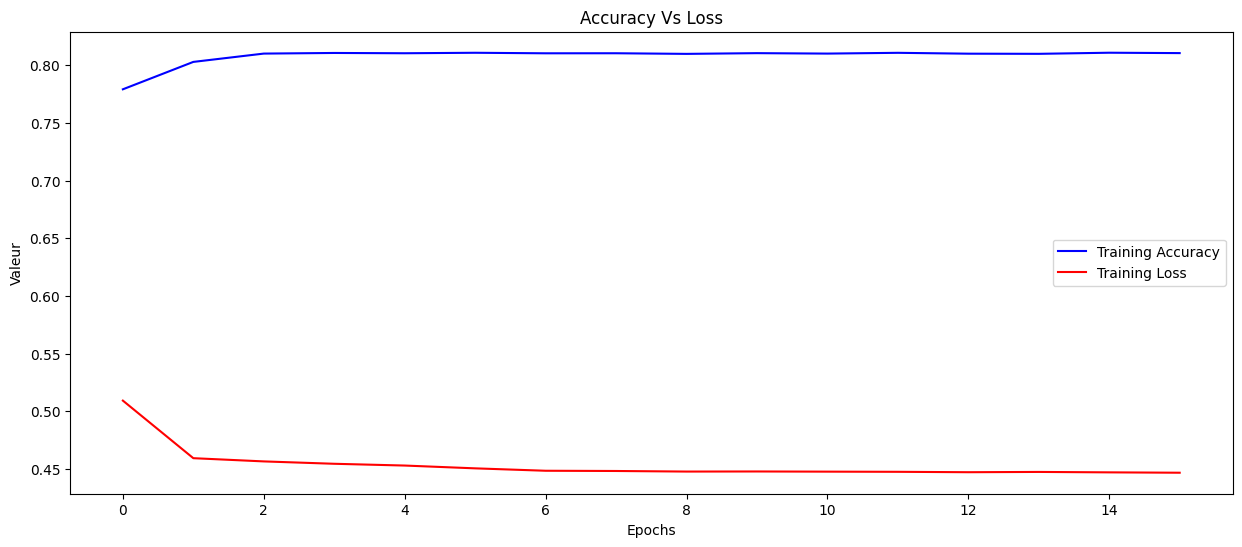

In [102]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Valeur')
plt.title('Accuracy Vs Loss') 
plt.legend()
plt.plot()
plt.show()

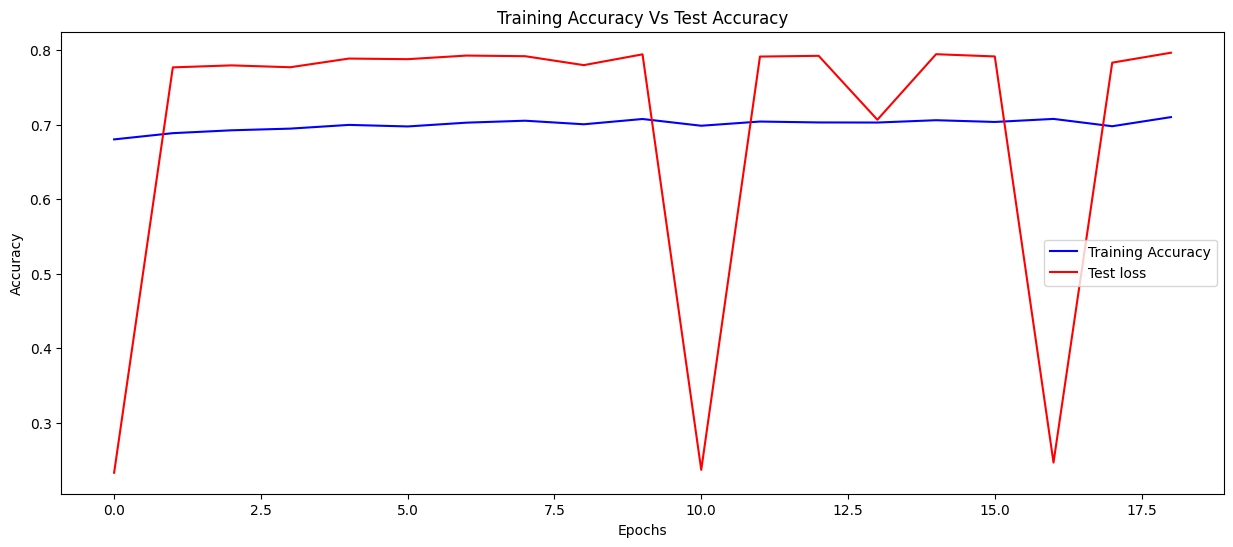

In [165]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test loss')
plt.xlabel('Epochs')    
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Test Accuracy')
plt.legend()
plt.plot()
plt.show()

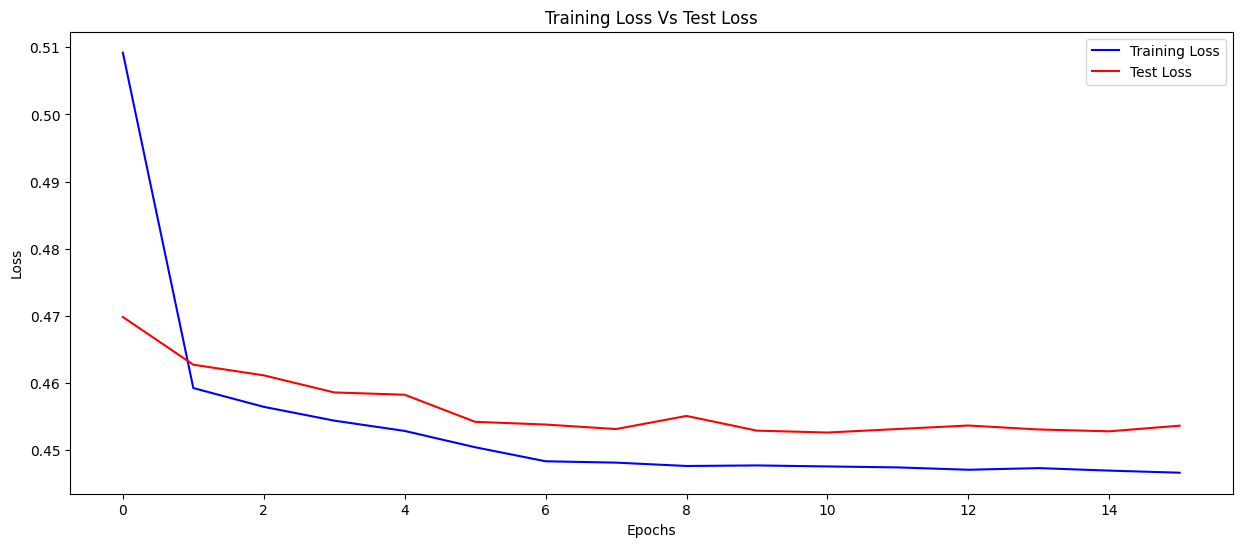

In [103]:
plt.figure(figsize=(15, 6))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Vs Test Loss')
plt.legend()
plt.plot()
plt.show()

## Evaluer le modele

In [166]:
model.evaluate(X_test, y_test)

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8004 - loss: 24.6933


[24.831138610839844, 0.7967655658721924]

In [167]:
# 
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_predit_lr = model_lr.predict(X_test)
print('Accuracy de LR : ', accuracy_score(y_test, y_predit_lr)*100, "%")
print('MSE de LR : ', mean_squared_error(y_test, y_predit_lr))
confusion_matrix(y_test, y_predit_lr)

Accuracy de LR :  81.11037012337445 %
MSE de LR :  0.1888962987662554


array([[4530,  130],
       [1003,  335]])

In [168]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)  
y_predict_rf = model_rf.predict(X_test)
print("Accuracy de RF: ", accuracy_score(y_test, y_predict_rf) * 100, "%")
print("MSE de RF: ", mean_squared_error(y_test, y_predict_rf))
confusion_matrix(y_test, y_predict_rf)

Accuracy de RF:  80.11003667889295 %
MSE de RF:  0.19889963321107035


array([[4311,  349],
       [ 844,  494]])

#### Deep Neural Network

In [169]:
model_dnn = Sequential()

In [170]:
# Ajout de la premiere couche
model_dnn.add(Dense(16, input_shape=(X_train.shape[1],), activation='relu'))

# Ajout de la deuxieme couche
model_dnn.add(Dense(32, activation ='relu'))
model_dnn.add(Dropout(0.5))

# Ajout de la troisieme couche
model_dnn.add(Dense(32, activation ='relu'))
model_dnn.add(Dropout(0.5))

# Ajout de la la couche de sortie
model_dnn.add(Dense(1, activation='sigmoid'))

# Compiler le Modele 


model_dnn.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
# Affichage de l'architecture du model
model_dnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 16)             │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,761 (6.88 KB)

 Trainable params: 1,761 (6.88 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
# Entrainement du model
history = model_dnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1, validation_data=(X_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=5)])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7411 - loss: 420.9891 - val_accuracy: 0.7769 - val_loss: 0.5308
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7823 - loss: 0.5247 - val_accuracy: 0.7769 - val_loss: 0.5308
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7788 - loss: 0.5288 - val_accuracy: 0.7769 - val_loss: 0.5308
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7747 - loss: 0.5338 - val_accuracy: 0.7769 - val_loss: 0.5311
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7822 - loss: 0.5244 - val_accuracy: 0.7769 - val_loss: 0.5308
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7783 - loss: 0.5292 - val_accuracy: 0.7769 - val_loss: 0.5308
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7829 - loss: 0.5234 - val_accuracy: 0.7769 - val_loss: 0.5308
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7765 - loss: 0.5315 - val_accuracy: 